# Simon Littlewood DSCI 100 Project Planning Stage Individual

# Data Description

This is a dataset created by reasearchers at UBC containing information about the activity of players on a public MineCraft server. The dataset contains two files; "players.csv" and "sessions.csv", however I only require players.csv to answer my question and so I will only be analyzing players.csv.

### players.csv

Each observation/row in this dataframe corresponds to a unique player that has played on the server before.

There are 196 observations in this dataframe (197 rows - 1 header row)

This dataframe contains 7 variables: 

- "experience" (chr/str); how experienced the player is at minecraft, ranging from Beginner to Veteran

- "subscribe" (logical/bool); whether or not the player is subscribed to the gaming newsletter

- "hashedEmail" (chr/str); a unique identifier for each player

- "played_hours" (numeric); how many total hours the player played on the server

- "name" (chr/str); the first name of the player

- "gender" (chr/str); the gender of the player

- "Age" (numeric); the age of the player

In [1]:
#Run this cell to load relevant libraries
library(tidyverse)
library(tidyr)
library(dplyr)
library(repr)
library(tidymodels)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
#Loading and assigning the raw dataframes, demonstrating they can be loaded into R

players <- read_csv("players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
# This cell will present summary statistics of the two dataframes. Summary statistics include mean for quantitative
# variables and the mode value for qualitative variables

#creating a function we can use multiple times to find the mode of a qualitative column rather than
#repeating the same code multiple times
find_mode <- function(dataframe, var){
    dataframe |>
        group_by({{var}}) |>
        summarise(count = n()) |>
        arrange(desc(count)) |>
        slice(1) |>
        pull({{var}})
    }

#creating a function we can use multiple times to find the mean of a quantitative column
find_mean <- function(dataframe, var){
    dataframe |>
        summarise(mean = mean({{var}}, na.rm = TRUE)) |>
        round(2) |>
        pull(mean)
    }

#creating a function we can use multiple times to find the maximum value of a quantitative column
find_max <- function(dataframe, var){
    dataframe |>
        arrange(desc({{var}})) |>
        slice(1) |>
        pull({{var}})
    }

#creating a function we can use multiple times to find the minimum value of a quantitative column
find_min <- function(dataframe, var){
    dataframe |>
        arrange({{var}}) |>
        slice(1) |>
        pull({{var}})
    }

players_gender_mode <- find_mode(players, gender)
players_experience_mode <- find_mode(players, experience)
players_subscribed_mode <- find_mode(players, subscribe)
players_played_hours_mean <- find_mean(players, played_hours)
players_age_mean <- find_mean(players, Age)
players_played_hours_max <- find_max(players, played_hours)
players_age_max <- find_max(players, Age)
players_played_hours_min <- find_min(players, played_hours)
players_age_min <- find_min(players, Age)

print(paste("The most common gender of players is", players_gender_mode))
print(paste("The most common experience level of players is", players_experience_mode))
print(paste("The most common subscription status of players is", players_subscribed_mode))
print(paste("The mean value for total hours played among all players is", players_played_hours_mean))
print(paste("The mean value of age among all players is", players_age_mean))
print(paste("The maximum value of total hours played among all players is", players_played_hours_max))
print(paste("The maximum value of age among all players is", players_age_max))
print(paste("The minimum value of total hours played among all players is", players_played_hours_min))
print(paste("The minimum value of age among all players is", players_age_min))

[1] "The most common gender of players is Male"
[1] "The most common experience level of players is Amateur"
[1] "The most common subscription status of players is TRUE"
[1] "The mean value for total hours played among all players is 5.85"
[1] "The mean value of age among all players is 21.14"
[1] "The maximum value of total hours played among all players is 223.1"
[1] "The maximum value of age among all players is 58"
[1] "The minimum value of total hours played among all players is 0"
[1] "The minimum value of age among all players is 9"


# Questions

### Broad Question

Question 1: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

### Specific Question

Can experience level, age, gender, and total hours played predict whether or not someone is subscribed or would subscribe to a game-related newsletter?

### How will the data help to answer this question?

By using the variables "experience", "Age", "gender" and "played_hours" from the players.csv dataframe as predictors, we can use exploratory visualizations and a knn classification engine to see if there is a correlation between the predictor variables and the response variable, "subscribe". 

Since some of these variabels are qualitative, not quantitative, "indicator/dummy" variables will have to be used in order to use them as predictors. These can be created using mutate. See Piazza question @1028.

# Exploratory Data Analysis and Visualization

In [4]:
### the players.csv dataset is already in tidy format, 
### since each variable is a column, each observation is a row, and each cell is a single value.

players_tidy <- players

In [5]:
### this cell will be used to present the mean value of the quantitative variables in players.csv in a table

players_mean_value_table <- tibble(
    Variable = c("Total Hours Played", "Age"), 
    Mean = c(players_played_hours_mean, players_age_mean)
)

players_mean_value_table

Variable,Mean
<chr>,<dbl>
Total Hours Played,5.85
Age,21.14


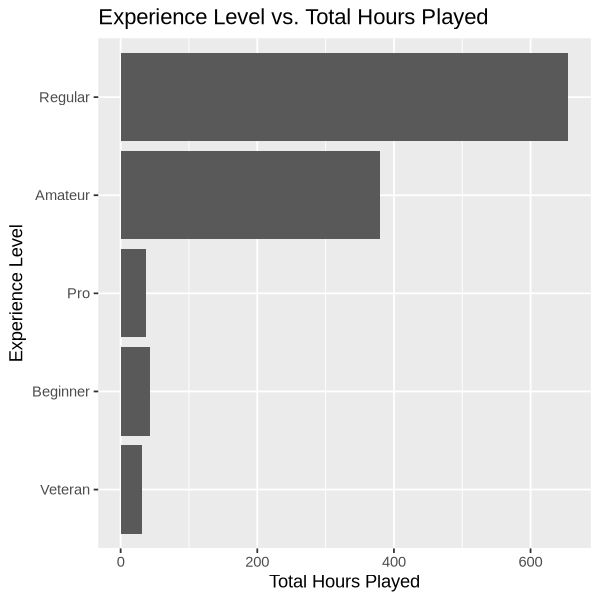

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_line()`).”


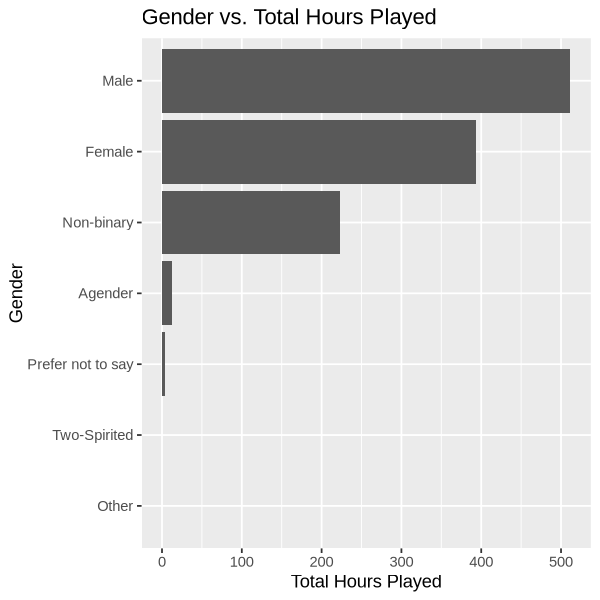

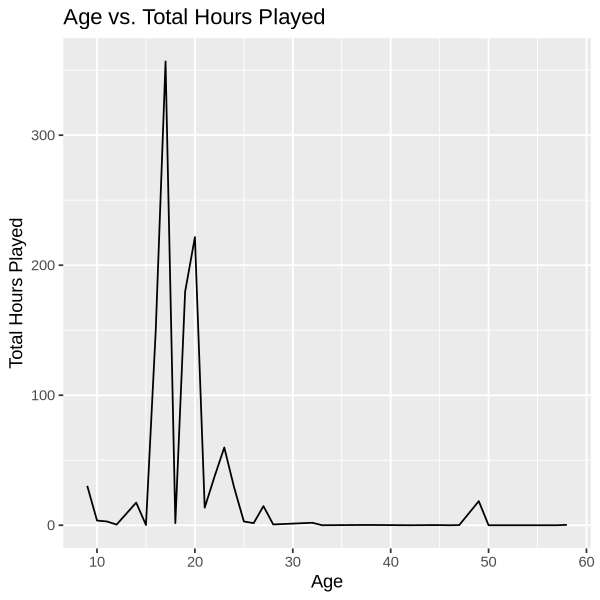

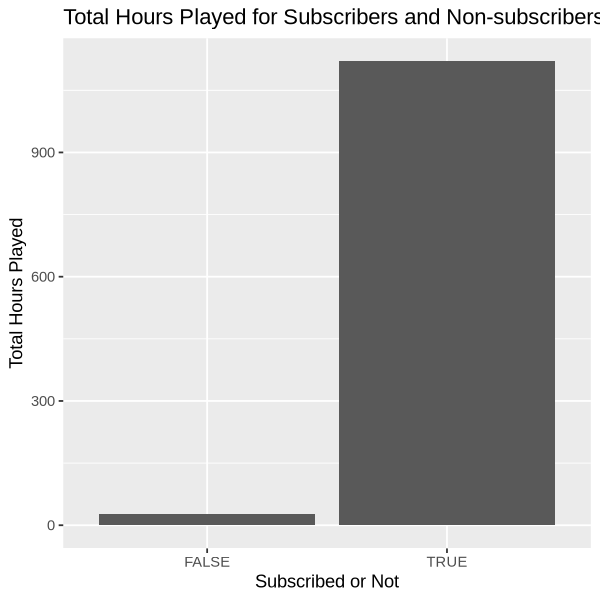

In [6]:
### this cell will be used to create some exploratory visualizations of the data
options(repr.plot.width = 5, repr.plot.height = 5)


experience_vs_hours_played <- players_tidy |>
    group_by(experience) |>
    summarise(total_hours = sum(played_hours, na.rm = TRUE))

experience_vs_hours_played_plot <- ggplot(players_tidy, aes(x = reorder(experience, played_hours), y = played_hours))+
    geom_bar(stat = "identity") +
    coord_flip() +
    labs(x = "Experience Level", y = "Total Hours Played", title = "Experience Level vs. Total Hours Played")


gender_vs_hours_played <- players_tidy |>
    group_by(gender) |>
    summarise(total_hours = sum(played_hours, na.rm = TRUE))

gender_vs_hours_played_plot <- ggplot(gender_vs_hours_played, aes(x = reorder(gender, total_hours), y = total_hours))+
    geom_bar(stat = "identity") +
    coord_flip() +
    labs(x = "Gender", y = "Total Hours Played", title = "Gender vs. Total Hours Played")


age_vs_hours_played <- players_tidy |>
    group_by(Age) |>
    summarise(total_hours = sum(played_hours, na.rm = TRUE))

age_vs_hours_played_plot <- ggplot(age_vs_hours_played, aes(x = Age, y = total_hours)) +
    geom_line() +
    labs(x = "Age", y = "Total Hours Played", title = "Age vs. Total Hours Played")


subscribe_vs_played_hours_plot <- ggplot(players_tidy, aes(x = subscribe, y = played_hours)) +
    geom_bar(stat = "identity") +
    labs(x = "Subscribed or Not", y = "Total Hours Played", 
         title = "Total Hours Played for Subscribers and Non-subscribers")

experience_vs_hours_played_plot
gender_vs_hours_played_plot
age_vs_hours_played_plot
subscribe_vs_played_hours_plot

# Methods and Plan

The method I will use to address my question of interest is knn classification, and tuning the classifier using cross-validation to find the most accurate value of k. 

This method is appropriate since I'm attempting to predict the qualitative variable, subscribe, which knn classification is used for. 

To effectively do this method, I'll have to scale and center the predictors and response variables.

With only 196 samples, certain outliers may skew the overall model. For example, if someone had a large playing time but didn't subscribe, this may skew the model's predictions a lot due to the overall sample size not being super large. This is a potential weakness of the method selected.

To compare and select the model, I'm going to use cross-validation to select the number of neighbors that lead to the highest accuracy for the model. 

The data will be split 70/30 training/testing initially, and then the training data will be split once more into 5 to perform cross-validation and parameter selection, which will occur before the model is tested on the testing data.